In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BAJFINANCE.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
5066,2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
5067,2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840
5068,2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021


In [3]:
df.set_index('Date', inplace=True)

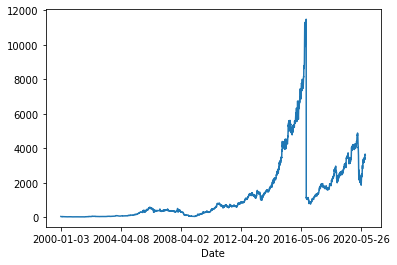

In [4]:
df['VWAP'].plot()
plt.show()

In [5]:
df.shape

(5070, 14)

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
#computing the mean of NaN values
nan_col = ['Trades', 'Deliverable Volume', '%Deliverble']
mean = df[nan_col].mean()
df.loc[:, nan_col] = df[nan_col].fillna(mean)

In [8]:
df.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,47105.843736,141968.990484,0.643712
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,47105.843736,141968.990484,0.643712
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,47105.843736,141968.990484,0.643712
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,47105.843736,141968.990484,0.643712
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,47105.843736,141968.990484,0.643712


In [9]:
data = df.copy()

In [10]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [11]:
for feature in lag_features:
    data[feature + 'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature + 'rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [12]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [13]:
data.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,0.0,NaN


In [14]:
data.shape

(5070, 34)

In [15]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Volumerolling_std_3       0
Volumerolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
dtype: int64

In [18]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [19]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [20]:
training_data=data[0:4500]
test_data=data[4500:]

In [21]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.50,40.25,40.10,40.25,5500,...,3.000556,3.709528,1.258306,3.052712,1.006645e+03,1.466125e+03,3.353967e+09,7.780466e+09,0.000000,0.000000
2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.00,39.00,39.00,39.80,1000,...,2.463737,4.300664,1.040833,3.087610,2.400694e+03,1.722401e+03,9.915353e+09,7.711740e+09,0.000000,0.000000
2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.50,39.50,39.50,39.37,1000,...,1.000000,3.191880,0.500000,2.146980,2.598076e+03,2.045902e+03,1.049654e+10,8.903806e+09,0.000000,0.000000
2000-01-14,BAJAUTOFIN,EQ,39.50,39.00,40.50,39.00,39.90,39.90,39.72,1700,...,0.500000,3.097849,0.288675,1.513117,4.041452e+02,2.173871e+03,1.612971e+09,9.499372e+09,0.000000,0.000000
2000-01-17,BAJAUTOFIN,EQ,39.90,39.05,41.00,38.40,39.20,39.20,39.84,3100,...,0.288675,2.915721,0.321455,1.359797,1.069268e+03,1.782053e+03,4.282258e+09,7.480525e+09,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-14,BAJFINANCE,EQ,1861.50,1863.10,1883.95,1842.95,1856.70,1864.50,1865.99,642971,...,12.172236,14.207334,12.550133,15.193514,8.122582e+04,7.632699e+04,1.500967e+13,1.405711e+13,3560.237398,7027.757886
2018-05-15,BAJFINANCE,EQ,1864.50,1865.25,1933.50,1854.50,1900.00,1901.95,1905.25,1570302,...,29.574778,23.323236,13.234330,15.495771,5.869608e+05,3.796835e+05,1.130564e+14,7.317497e+13,23268.447742,14876.155361
2018-05-16,BAJFINANCE,EQ,1901.95,1892.50,1929.00,1872.90,1929.00,1919.95,1908.26,952836,...,27.401201,27.374554,15.104994,18.737348,4.720917e+05,3.712209e+05,9.102345e+13,7.190084e+13,18465.198943,14373.904212


In [22]:
!pip install pmdarima

In [23]:
from pmdarima import auto_arima
print(training_data[ind_features].dtypes)

Highrolling_mean_3        float64
Highrolling_mean_7        float64
Lowrolling_mean_3         float64
Lowrolling_mean_7         float64
Volumerolling_mean_3      float64
Volumerolling_mean_7      float64
Turnoverrolling_mean_3    float64
Turnoverrolling_mean_7    float64
Tradesrolling_mean_3      float64
Tradesrolling_mean_7      float64
Highrolling_std_3         float64
Highrolling_std_7         float64
Lowrolling_std_3          float64
Lowrolling_std_7          float64
Volumerolling_std_3       float64
Volumerolling_std_7       float64
Turnoverrolling_std_3     float64
Turnoverrolling_std_7     float64
Tradesrolling_std_3       float64
Tradesrolling_std_7       float64
dtype: object


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=48153.972, Time=18.76 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48151.077, Time=12.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=48151.035, Time=13.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=48150.951, Time=16.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81504.332, Time=11.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=48155.115, Time=16.89 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=48150.825, Time=17.35 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=48150.427, Time=18.43 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=48133.215, Time=20.31 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=48131.218, Time=19.52 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=48133.265, Time=21.15 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=48135.186, Time=22.00 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=48130.467, Time=18.76 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=48149.930, Time=17.29 sec
 ARIM

In [26]:
model.fit(training_data['VWAP'], training_data[ind_features])

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

In [28]:
test_data["Forecast_ARIMA"] = forecast

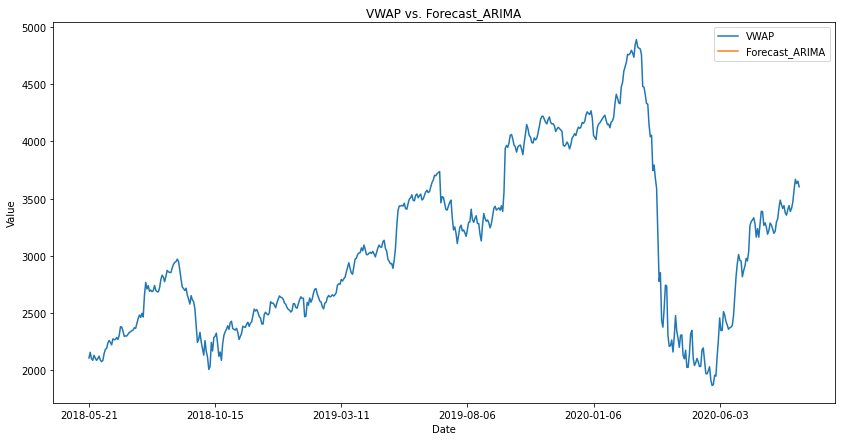

In [30]:
test_data["Forecast_ARIMA"] = forecast
test_data[['VWAP', 'Forecast_ARIMA']].plot(figsize=(14, 7))
plt.title('VWAP vs. Forecast_ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(['VWAP', 'Forecast_ARIMA'])
plt.show()